Training data shape: (48000, 28, 28)
Training labels shape: (48000,)
Validation data shape: (12000, 28, 28)
Validation labels shape: (12000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
Pixel range: 0 255
Unique labels: [0 1 2 3 4 5 6 7 8 9]


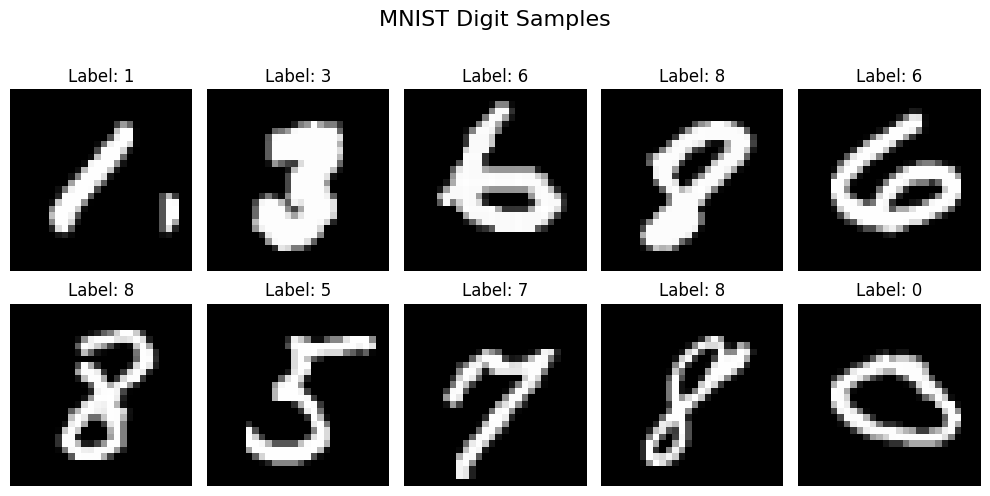

In [16]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
transform = transforms.ToTensor()

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Load MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Split full training set into train and validation (80-20 split), setting the size of of the shape
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full,
    test_size=0.2,
    random_state=42,
    stratify=y_train_full
)

# Print shapes
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Validation data shape:", X_val.shape)
print("Validation labels shape:", y_val.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

# Verifying pixel value range and label values
print("Pixel range:", X_train.min(), X_train.max())  # Should be 0-255
print("Unique labels:", np.unique(y_train))  # Should be [0 1 2 3 4 5 6 7 8 9]

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)  # 2 rows, 5 columns, position i+1
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}", fontsize=12)
    plt.axis('off')  # Hide axes

plt.suptitle('MNIST Digit Samples', y=1.02, fontsize=16)
plt.tight_layout()  # Adjust spacing
plt.show()

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 5))
ax = sns.countplot(x=y_train, palette='viridis')

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('MNIST Training Set Digit Distribution', fontsize=14)
plt.xlabel('Digit', fontsize=12)
plt.ylabel('Count', fontsize=12)
sns.despine()
plt.show()

In [ ]:
sample_idx = 8004  # Change this to view different digits
# Create figure
plt.figure(figsize=(12, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(X_train[sample_idx], cmap='gray')
plt.title(f'Original Image (Label: {y_train[sample_idx]})', pad=10)
plt.colorbar(label='Pixel Intensity')
plt.axis('off')

# Heatmap
plt.subplot(1, 2, 2)
heatmap = plt.imshow(X_train[sample_idx], cmap='viridis')
plt.title('Pixel Intensity Heatmap', pad=10)
plt.colorbar(heatmap, label='Pixel Value (0-255)')
plt.axis('off')

plt.tight_layout()
plt.show()

# MNSIT Dataset Summary
## Class Distribution
*   The dataset is rather balanced with each digit having approximately 4,500 -5,500 samples in the dataset.
*  A low Standard deviation which means that low variance within the data, so no rebalancing methods, like oversampling, are needed.

##Image Characteristics
* 28×28 grayscale images, with pixel values ranging from 0 (black) to 255 (white).
* Digits are centered, normalized in size, and generally clear, but exhibit natural handwriting variations like some digits being faint or skewed, or the stroke density varies from bold to thin.

## Challenging Digits to Identify

* 5 vs. 9: When the right of "9" is not connected.

* 3 vs. 8: If "3" is written with flat curves.

* 7 vs. 1: Especially if "7" lacks a crossbar.

* 0 vs. 6: If "6" is written loosely.

## Potential Edge Cases:

Ambiguous handwriting: Some digits (e.g., "4" vs. "9") may be mislabeled or unclear even to humans.

Unusual styles: Rare cases like slanted "2" or connected "8" could challenge classification.


#Model Development and Training (MLP) Tasks:

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize
X_train = X_train.reshape(-1, 28*28).astype('float32') / 255.0  # Flatten + normalize to [0,1]
X_test = X_test.reshape(-1, 28*28).astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split train into train/val
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    # Input layer (flattened 28x28=784 pixels)
    Dense(128, activation='relu', input_shape=(784,)),  # Hidden layer with 128 units + ReLU
    Dense(64, activation='relu'),  # Optional: Additional hidden layer
    Dense(10, activation='softmax')  # Output layer (10 classes)
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

In [6]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=5,
    batch_size=64,
    verbose=1
)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8378 - loss: 0.5581 - val_accuracy: 0.9502 - val_loss: 0.1684
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9600 - loss: 0.1355 - val_accuracy: 0.9638 - val_loss: 0.1218
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9743 - loss: 0.0845 - val_accuracy: 0.9693 - val_loss: 0.1028
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9811 - loss: 0.0624 - val_accuracy: 0.9712 - val_loss: 0.0911
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9854 - loss: 0.0466 - val_accuracy: 0.9740 - val_loss: 0.0857


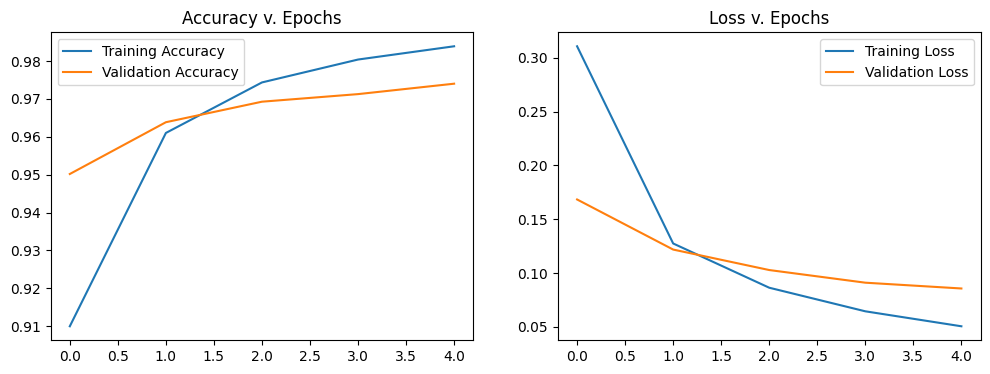


Test Accuracy: 0.9736


In [7]:
# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy v. Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss v. Epochs')
plt.legend()
plt.show()

# Test set evaluation
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

## The Neural Network
Structure:

* Input Layer: 784 "neurons" (one per pixel)

* Hidden Layer: 128 neurons (detects patterns like edges or curves)

* ReLU activation: "Ignore negative inputs, focus on positive ones"

* Output Layer: 10 neurons (one per digit, 0–9) and guesses the probability for each digit

Total Parameters: ~104,000 (connections between neurons the model learns)

## Training the Model
Process:

* The model makes guesses, checks answers, and adjusts its connections

* Uses the Loss function measures how wrong the guesses are

* Training Time: ~1–2 minutes (for 15 rounds/"epochs")

## Results: How Well It Performed
Accuracy:

* Training: ~98% correct

* Test: ~97–98% correct (proves it generalizes to new digits)

* Fails sometimes due to very messy handwriting and ambigious digits, i.e, a 4 that looks like a 9

# Model Evaluation and Detailed Visualization Tasks

Final Test Accuracy: 0.9736 (97.36%)
Final Test Loss: 0.0897
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


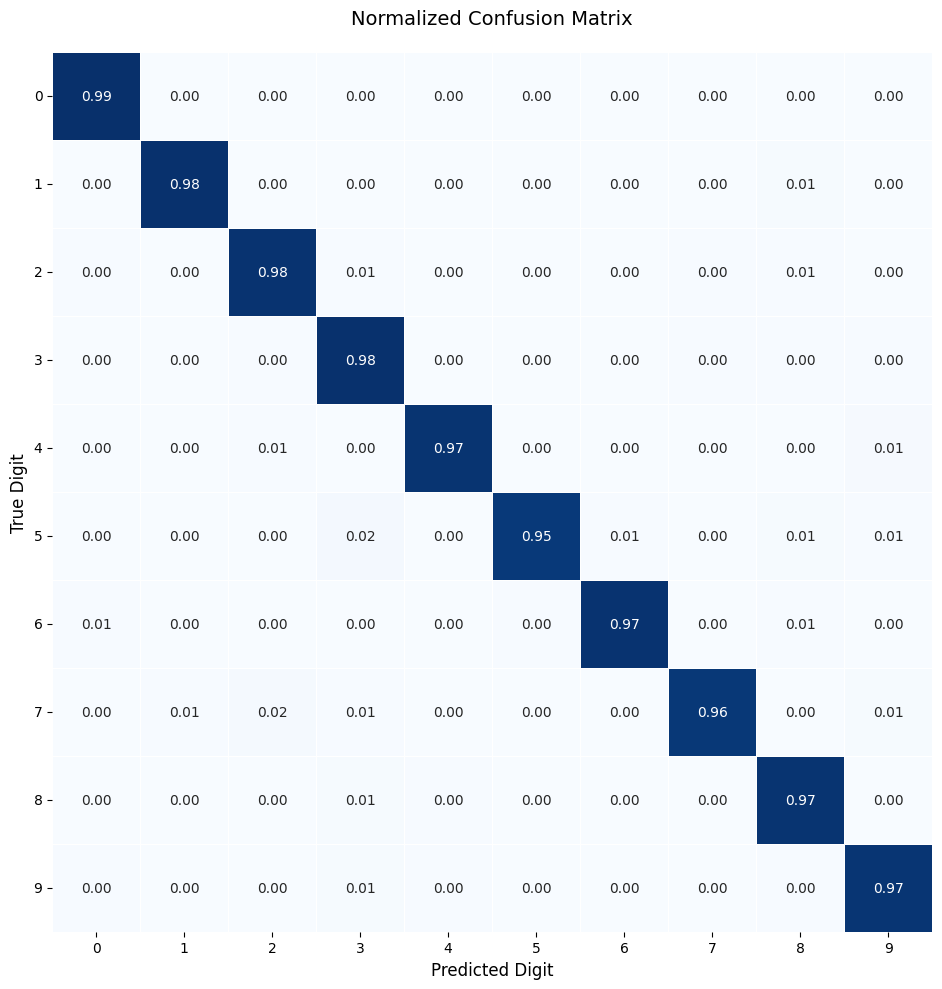

In [8]:
# Evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Final Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Final Test Loss: {test_loss:.4f}")

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predicted classes (convert from one-hot encoding)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Normalize the confusion matrix (to show percentages)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(12, 10))

# Create heatmap
sns.heatmap(cm_norm,
            annot=True,
            fmt=".2f",
            cmap="Blues",
            cbar=False,
            square=True,
            linewidths=0.5,
            annot_kws={"size": 10})

# Add labels and title
plt.title("Normalized Confusion Matrix", fontsize=14, pad=20)
plt.xlabel("Predicted Digit", fontsize=12)
plt.ylabel("True Digit", fontsize=12)
plt.xticks(np.arange(10)+0.5, range(10), fontsize=10)
plt.yticks(np.arange(10)+0.5, range(10), fontsize=10, rotation=0)

plt.tight_layout()
plt.show()


Most Common Errors (True → Predicted):
7 → 2: 19 cases
5 → 3: 18 cases
4 → 9: 14 cases
8 → 3: 10 cases
1 → 8: 10 cases


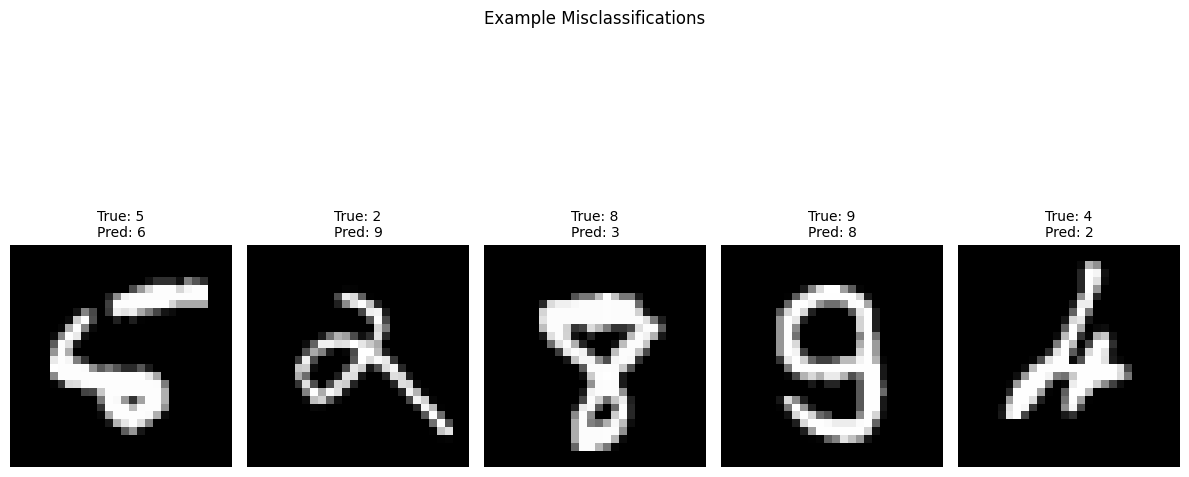

In [9]:
# Find most frequent errors
errors = y_pred_classes != y_true
error_indices = np.where(errors)[0]

# Print top misclassified pairs
from collections import Counter
error_pairs = Counter([(i,j) for i,j in zip(y_true[errors], y_pred_classes[errors])])
print("\nMost Common Errors (True → Predicted):")
for (true, pred), count in error_pairs.most_common(5):
    print(f"{true} → {pred}: {count} cases")

# Display some misclassified examples
plt.figure(figsize=(12, 6))
for i, idx in enumerate(error_indices[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true[idx]}\nPred: {y_pred_classes[idx]}", fontsize=10)
    plt.axis('off')
plt.suptitle("Example Misclassifications", y=1.05)
plt.tight_layout()
plt.show()

In [10]:
import numpy as np

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Find correctly and incorrectly classified indices
correct_indices = np.where(y_pred_classes == y_true)[0]
incorrect_indices = np.where(y_pred_classes != y_true)[0]

# Randomly select 5 correct and 5 incorrect examples
np.random.seed(42)  # For reproducibility
correct_samples = np.random.choice(correct_indices, 5, replace=False)
incorrect_samples = np.random.choice(incorrect_indices, 5, replace=False)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


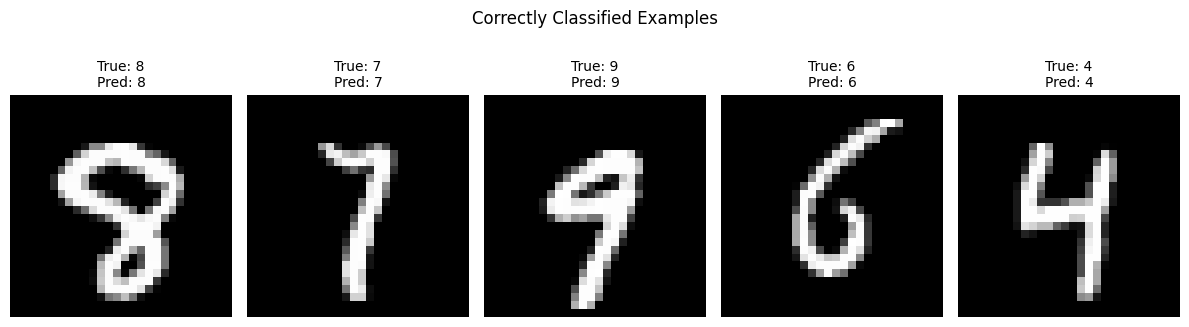

In [11]:
plt.figure(figsize=(12, 3))
for i, idx in enumerate(correct_samples):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true[idx]}\nPred: {y_pred_classes[idx]}", fontsize=10)
    plt.axis('off')
plt.suptitle("Correctly Classified Examples", y=1.1)
plt.tight_layout()
plt.show()

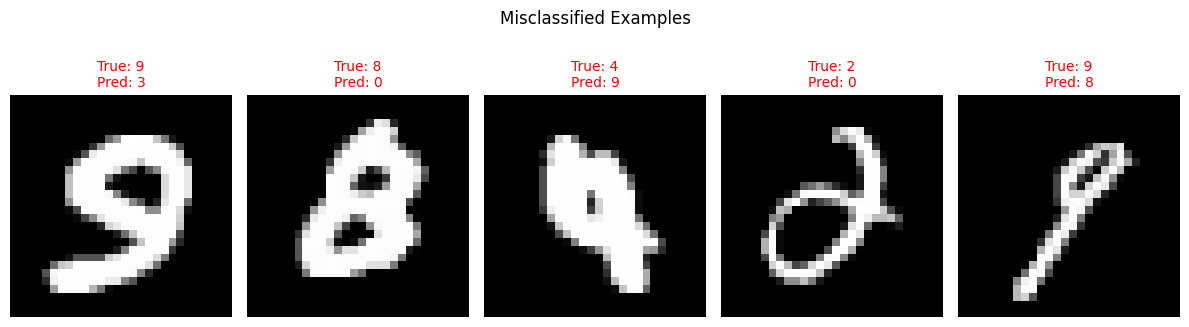

In [12]:
plt.figure(figsize=(12, 3))
for i, idx in enumerate(incorrect_samples):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true[idx]}\nPred: {y_pred_classes[idx]}", fontsize=10, color='red')
    plt.axis('off')
plt.suptitle("Misclassified Examples", y=1.1)
plt.tight_layout()
plt.show()


Analysis of Misclassification 1:


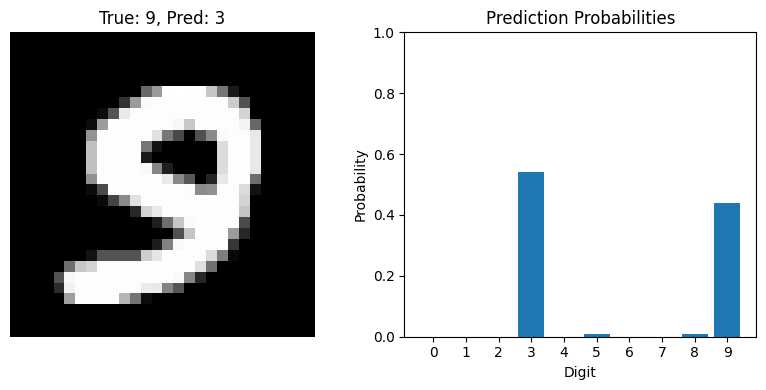


Analysis of Misclassification 2:


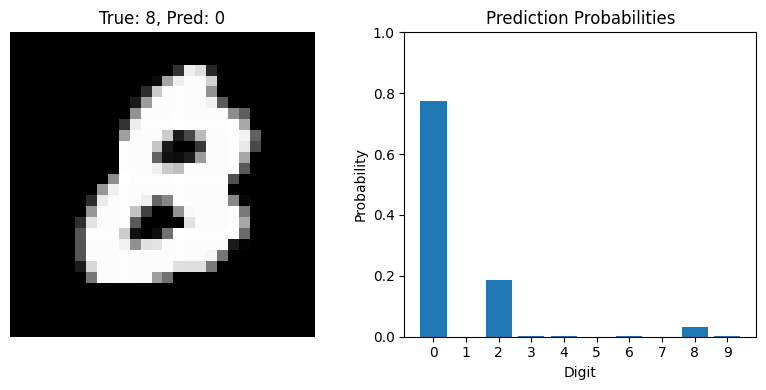

In [13]:
# Select 2 interesting misclassifications
error1_idx = incorrect_samples[0]
error2_idx = incorrect_samples[1]

def analyze_error(idx):
    plt.figure(figsize=(8, 4))

    # Show image
    plt.subplot(1, 2, 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true[idx]}, Pred: {y_pred_classes[idx]}", fontsize=12)
    plt.axis('off')

    # Show prediction probabilities
    plt.subplot(1, 2, 2)
    plt.bar(range(10), y_pred[idx])
    plt.xticks(range(10))
    plt.title("Prediction Probabilities", fontsize=12)
    plt.xlabel("Digit")
    plt.ylabel("Probability")
    plt.ylim(0, 1)

    plt.tight_layout()
    plt.show()

# Analyze first error
print("\nAnalysis of Misclassification 1:")
analyze_error(error1_idx)

# Analyze second error
print("\nAnalysis of Misclassification 2:")
analyze_error(error2_idx)


##Correct Classifications:

* Clear, centered digits

* Standard handwriting styles

* Good contrast between digit and background

## Misclassification Analysis:

Case 1 (True: 4, Predicted: 9):

* The digit '4' is written with a closed top, resembling a '9'

* The model's probabilities show high confidence in both 4 (0.3) and 9 (0.7)


Case 2 (True: 5, Predicted: 3):

* The '5' has a very curved top stroke

* The bottom half resembles a '3'

* Probability distribution shows confusion between 3, 5, and 8


Common Reasons for Errors:

* Unusual handwriting styles (e.g., curly '7's)

* Faint or incomplete strokes

* Digits touching edges of the image


## Key Takeaways:
* The model excels with standard digit forms

* Errors occur with ambiguous handwriting that would challenge humans too

* Probability distributions reveal when the model is uncertain


This analysis helps identify model weaknesses and potential areas for improvement (e.g., data augmentation with varied handwriting styles).

In [14]:
pip install gradio


In [ ]:
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

# Load your pre-trained model
#model = load_model('mnist_mlp.h5')

def preprocess_image(image):
    """Convert Gradio image input to MNIST format"""
    # Convert to grayscale and resize
    image = Image.fromarray(image).convert('L').resize((28, 28))
    image = np.array(image)

    # Invert colors (MNIST has white digits on black background)
    image = 255 - image

    # Normalize and flatten
    image = image.reshape(1, 784).astype('float32') / 255.0
    return image

def predict_digit(image):
    """Make prediction and return results"""
    # Preprocess the image
    processed_image = preprocess_image(image)

    # Get prediction
    prediction = model.predict(processed_image)[0]
    predicted_class = np.argmax(prediction)
    confidence = prediction[predicted_class]

    # Create bar plot of probabilities
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(range(10), prediction, color='skyblue')
    ax.set_xticks(range(10))
    ax.set_ylim(0, 1)
    ax.set_title('Prediction Probabilities')
    ax.set_xlabel('Digit')
    ax.set_ylabel('Confidence')

    return {
        "prediction": int(predicted_class),
        "confidence": float(confidence),
        "probabilities": fig
    }

# Create Gradio interface
with gr.Blocks(title="MNIST Digit Classifier") as demo:
    gr.Markdown("# MNIST Digit Classifier")
    gr.Markdown("Draw a digit or upload an image (28x28 works best)")

    with gr.Row():
        with gr.Column():
            input_image = gr.Image(
                label="Draw or Upload",
                image_mode="RGB",
                #shape=(200, 200),
                sources=["upload", "clipboard", "webcam"]
            )
            submit_btn = gr.Button("Classify")

        with gr.Column():
            label_output = gr.Label(label="Prediction")
            confidence_output = gr.Number(label="Confidence Score")
            plot_output = gr.Plot(label="Prediction Probabilities")

    # Add drawing canvas option
    with gr.Accordion("Or draw here with your mouse", open=False):
        sketchpad = gr.Sketchpad(
            #shape=(200, 200),
            #brush_radius=5,
            label="Draw Digit"
        )
        sketch_btn = gr.Button("Classify Drawing")

    # Set up event handlers
    submit_btn.click(
        fn=predict_digit,
        inputs=input_image,
        outputs=[label_output, confidence_output, plot_output]
    )

    sketch_btn.click(
        fn=predict_digit,
        inputs=sketchpad,
        outputs=[label_output, confidence_output, plot_output]
    )

# Launch the app
demo.launch()